Now we can try to answer the question if birds are afraid of dogs. the null hypothesis is : There is no significant difference in dirds detections 1 min before and 1 min after a dog barks or howls.
MIT_AST_labels have labels = ['Bow-wow', 'Yip','Dog', 'Bark', 'Howl', 'Growling', 'Whimper(dog)'] associated with dogs.


In [2]:
# let's see how MIT_AST labels are 'bark'
import pandas as pd
full_data = pd.read_csv('stats_25.04_full.csv')
# set datetime as index
full_data['datetime'] = pd.to_datetime(full_data['datetime'])
full_data.set_index('datetime', inplace=True)
# get only daytime data
daytime_data = full_data.between_time('04:00', '22:00')
daytime_data.shape



(334779, 13)

In [3]:
# add 'Bird_Detections' column to daytime_data as 'BirdNET' Nan values are 0 and detections are 1
daytime_data['Bird_Detections'] = daytime_data['BirdNET'].apply(lambda x: 0 if pd.isna(x) else 1)

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_91655/2167999244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['Bird_Detections'] = daytime_data['BirdNET'].apply(lambda x: 0 if pd.isna(x) else 1)


In [17]:
daytime_data.head()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label,Bird_Detections
datetime,,,,,,,,,,,,,,
2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird,0
2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,1
2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,1
2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird,1
2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird,0


In [4]:
labels = ['Bow-wow', 'Yip','Dog', 'Bark', 'Howl', 'Growling', 'Whimper(dog)']
dog_data = daytime_data[daytime_data['MIT_AST_label'].isin(labels)]
print(dog_data.shape)

(677, 14)


In [5]:
# handle duplicate timestamps
daytime_data = daytime_data[~daytime_data.index.duplicated(keep='first')]


In [25]:
# check if duplicate timestamps exist
print("Duplicate Timestamps Exist:", daytime_data.index.duplicated().any())
if daytime_data.index.duplicated().any():
    print("Number of duplicate timestamps:", daytime_data.index.duplicated().sum())


Duplicate Timestamps Exist: False


In [34]:
dog_data.head()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label,Bird_Detections
datetime,,,,,,,,,,,,,,
2023-08-11 20:03:29,0.0,1018.83,20.9,5.5,1.7,24.7,78.9,200.0,0.0,25.1,NaN,Bow-wow,animal,0
2023-08-12 11:30:32,0.0,1015.61,19.9,7.2,3.4,20.1,98.8,189.0,3.0,331.4,NaN,Bow-wow,animal,0
2023-09-02 10:40:23,0.0,1022.01,18.5,3.5,0.4,19.0,96.3,154.0,2.0,281.9,NaN,Bow-wow,animal,0
2023-09-02 10:40:30,0.0,1022.01,18.5,3.5,0.4,19.0,96.3,154.0,2.0,281.9,NaN,Bow-wow,animal,0
2023-09-02 13:08:19,0.0,1023.13,19.9,5.5,1.0,22.4,85.6,121.0,7.0,737.0,NaN,Bow-wow,animal,0


Here we create bins of dog detections. A bin consists of dog detections less then 2 min apart from each other.

In [7]:
import pandas as pd

# create bins of Dog detections with interbin interval of 2 minutes (120 seconds)


# Initialize variables
current_bin = 0
current_bin_entries = []
last_index = None

# Define a function to create bins
def create_bin(index):
    global current_bin, current_bin_entries, last_index
    if last_index is None or (index - last_index).total_seconds() <= 120:
        current_bin_entries.append(index)
    else:
        current_bin += 1
        current_bin_entries = [index]
    last_index = index
    return current_bin

# Apply the function to create bins
dog_data['bin'] = dog_data.index.map(create_bin)

dog_data['bin'].value_counts().to_dict()


{380: 8,
 80: 8,
 136: 6,
 294: 6,
 206: 5,
 91: 5,
 156: 5,
 288: 5,
 35: 4,
 243: 4,
 382: 4,
 185: 4,
 149: 4,
 319: 4,
 313: 4,
 458: 4,
 154: 4,
 92: 4,
 357: 4,
 88: 4,
 249: 4,
 293: 4,
 129: 3,
 128: 3,
 195: 3,
 125: 3,
 295: 3,
 298: 3,
 193: 3,
 232: 3,
 231: 3,
 395: 3,
 310: 3,
 407: 3,
 81: 3,
 108: 3,
 404: 3,
 20: 3,
 289: 3,
 153: 3,
 146: 3,
 450: 3,
 363: 3,
 9: 3,
 190: 3,
 290: 3,
 445: 3,
 172: 2,
 398: 2,
 358: 2,
 152: 2,
 214: 2,
 96: 2,
 215: 2,
 216: 2,
 162: 2,
 155: 2,
 356: 2,
 86: 2,
 393: 2,
 336: 2,
 161: 2,
 174: 2,
 100: 2,
 138: 2,
 210: 2,
 379: 2,
 197: 2,
 130: 2,
 179: 2,
 141: 2,
 122: 2,
 121: 2,
 378: 2,
 347: 2,
 359: 2,
 186: 2,
 116: 2,
 323: 2,
 112: 2,
 148: 2,
 196: 2,
 387: 2,
 169: 2,
 87: 2,
 220: 2,
 446: 2,
 242: 2,
 431: 2,
 244: 2,
 48: 2,
 47: 2,
 436: 2,
 438: 2,
 292: 2,
 37: 2,
 443: 2,
 28: 2,
 237: 2,
 25: 2,
 451: 2,
 452: 2,
 454: 2,
 19: 2,
 284: 2,
 262: 2,
 461: 2,
 263: 2,
 6: 2,
 426: 2,
 246: 2,
 414: 2,
 236: 2,
 30

In [10]:

# how many bins of each size
dog_data['bin'].value_counts().value_counts().to_dict()



{1: 350, 2: 74, 3: 25, 4: 14, 5: 4, 8: 2, 6: 2}

Hypothesis Testing

Null Hypothesis (H0): There is ni difference in the number of bird detections before and after a dog barks.

Alternative Hypothesis (H1): There is a difference in the number of bird's detections in 1 min interval before and after dog detection.

Statistical Test
Step 1: Normality Test

You can use the Shapiro-Wilk test to check the normality of the distributions of pre_counts and post_counts. This will guide whether you use parametric tests (like the t-test) or non-parametric tests (like the Mann-Whitney U test).

Step 2: Choose and Perform Hypothesis Test
Based on the normality test results:

If data are normally distributed: Use an Independent Samples t-Test (assuming equal or unequal variances).
If data are not normally distributed: Use the Mann-Whitney U Test.



In [47]:
import pandas as pd

# Sample structure of dog_data, assuming it's correctly loaded and datetime is set as index
# Assuming 'Bird_Detections' is a column in 'daytime_data' which contains either 0 or 1

# Generate bin ranges
bin_ranges = dog_data.groupby('bin').apply(lambda x: pd.Series({'start_time': x.index.min(), 'end_time': x.index.max()}))
bin_ranges['start_time'] = bin_ranges['start_time'] - pd.Timedelta(seconds=60)
bin_ranges['end_time'] = bin_ranges['end_time'] + pd.Timedelta(seconds=60)

# Initialize lists to store the count of detections
pre_counts = []
post_counts = []

for _, row in bin_ranges.iterrows():
    # Count detections in the 1-minute period before the first entry in each bin
    mask_pre = (daytime_data.index >= (row['start_time'] - pd.Timedelta(seconds=60))) & (daytime_data.index < row['start_time'])
    pre_count = daytime_data.loc[mask_pre, 'Bird_Detections'].sum()
    pre_counts.append(pre_count)

    # Count detections in the 1-minute period after the last entry in each bin
    mask_post = (daytime_data.index > row['end_time']) & (daytime_data.index <= (row['end_time'] + pd.Timedelta(seconds=60)))
    post_count = daytime_data.loc[mask_post, 'Bird_Detections'].sum()
    post_counts.append(post_count)


# Display shapes and maybe a few rows to confirm the results
print(len(pre_counts),len(post_counts))




/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_94617/2714168651.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bin_ranges = dog_data.groupby('bin').apply(lambda x: pd.Series({'start_time': x.index.min(), 'end_time': x.index.max()}))


481 481


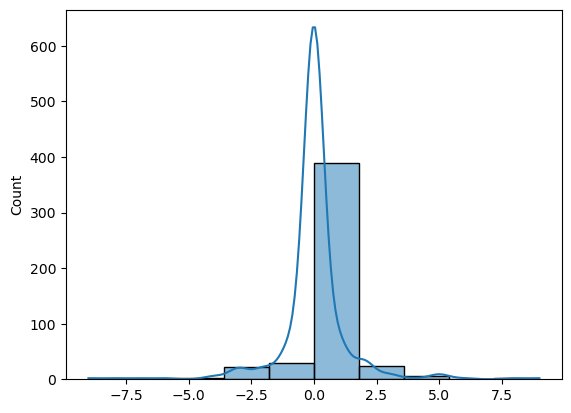

In [51]:
# let's check the assumptions for using paired t-test
# get the diff between pre and post counts and check for normality
diff = [pre_counts[i] - post_counts[i] for i in range(len(pre_counts))]
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(diff, kde=True)
plt.show()



In [53]:
# let's check the assumptions for using paired t-test

# get the diff between pre and post counts and check for normality

from scipy.stats import shapiro
stat, p = shapiro(diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# the diff is not normally distributed, we can use Wilcoxon signed-rank test
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(pre_counts, post_counts)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')

else:
    print('Different distribution (reject H0)') 
# the p-value is less than 0.05, so we reject the null hypothesis that there is no difference between the pre and post counts

Statistics=0.604, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=3826.500, p=0.666
Same distribution (fail to reject H0)


Given Results: Statistics = 3826.500, p = 0.666

Interpretation: With a p-value of 0.666, which is greater than the common alpha level of 0.05, you fail to reject the null hypothesis. This means there is no significant evidence to suggest that the median score difference between the two tests is different from zero. The students' performance on the two tests was statistically similar.


In [49]:
import scipy.stats as stats
import pandas as pd

# Convert lists to pandas Series for easier handling
pre_counts_series = pd.Series(pre_counts)
post_counts_series = pd.Series(post_counts)
print(pre_counts_series.mean(), post_counts_series.mean())
# Step 1: Normality Test
stat_pre, p_pre = stats.shapiro(pre_counts_series)
stat_post, p_post = stats.shapiro(post_counts_series)

# Print normality test results
print(f"Normality Test Results:")
print(f"Pre-counts - Statistics={stat_pre}, p-value={p_pre}")
print(f"Post-counts - Statistics={stat_post}, p-value={p_post}")

# Set the significance level
alpha = 0.05

# Step 2: Choose and perform hypothesis test based on normality results
if p_pre > alpha and p_post > alpha:
    print("Both samples are normally distributed, performing t-test...")
    # Independent Samples t-Test
    t_stat, p_value = stats.ttest_ind(pre_counts_series, post_counts_series, equal_var=False)  # Welch's T-test for unequal variances
    test_name = "Independent Samples t-Test"
else:
    print("At least one sample is not normally distributed, performing Mann-Whitney U test...")
    # Mann-Whitney U Test
    u_stat, p_value = stats.mannwhitneyu(pre_counts_series, post_counts_series, alternative='two-sided')
    test_name = "Mann-Whitney U Test"

# Step 3: Interpret results
print(f"{test_name} results: Statistic = {u_stat if 'Mann' in test_name else t_stat}, P-value = {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in bird detections before and after dog detections.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in bird detections before and after dog detections.")


0.4573804573804574 0.43451143451143454
Normality Test Results:
Pre-counts - Statistics=0.4300009780166, p-value=2.5843728998822844e-36
Post-counts - Statistics=0.39310872288175147, p-value=3.831996159730024e-37
At least one sample is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test results: Statistic = 118609.0, P-value = 0.3206922597327748
Fail to reject the null hypothesis - There is no significant difference in bird detections before and after dog detections.


The results from your analysis indicate that neither the pre-counts nor the post-counts data are normally distributed, as shown by the very low p-values in the Shapiro-Wilk tests. Consequently, you appropriately performed the Mann-Whitney U test, which is suitable for comparing two independent samples that do not follow a normal distribution.

Interpretation of the Mann-Whitney U Test Results:

Statistic (U): The Mann-Whitney U statistic of 118609.0 doesn't provide much information by itself without context or comparison to critical values, but it is used to calculate the p-value.
P-value: The p-value of 0.3206922597327748 is significantly higher than the typical alpha level of 0.05. This means there is not enough evidence to reject the null hypothesis.

Conclusion:

The analysis concludes that there is no significant difference in the number of bird detections before and after dog detections based on the data you have. This suggests that, according to your data and the statistical tests performed, the presence or events related to dog detections do not have a measurable impact on the rates of bird detections in the studied intervals.

